In [13]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import math
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

In [14]:
data = pd.read_csv("pulse_data_time.csv")
df = pd.DataFrame(data)
df.head()

,ID,Pulse,Label
0,0,58,Abnormal
1,1,58,Abnormal
2,2,58,Abnormal
3,3,58,Abnormal
4,4,57,Abnormal


<AxesSubplot:xlabel='ID'>

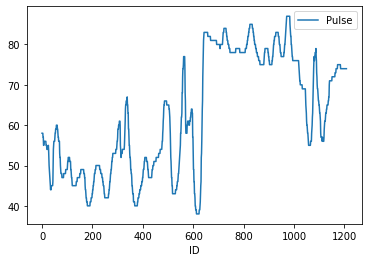

In [15]:
df.plot(x='ID', y='Pulse')

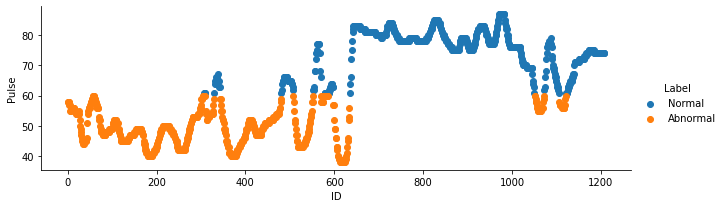

In [17]:
import seaborn as sns
_Label = ['Normal', 'Abnormal']
fg = sns.FacetGrid(data=df, hue='Label', hue_order=_Label, aspect=3)
fg.map(plt.scatter, 'ID', 'Pulse').add_legend()

In [18]:
df.drop(["Label"],  axis=1)

,ID,Pulse
0,0,58
1,1,58
2,2,58
3,3,58
4,4,57
...,...,...
1204,1204,74
1205,1205,74
1206,1206,74
1207,1207,74


col = df['ID']
type(col[0])

In [20]:
s = pd.Series(df['Pulse'])
s = s.diff()

<AxesSubplot:>

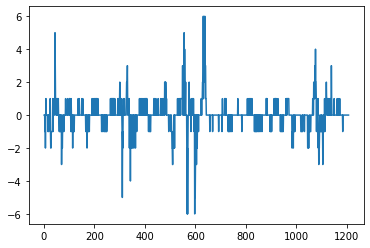

In [21]:
s.plot()
# slow deterioration = -1
# fast deterioration = -2
# slow recovery = 1
#fast recovery = 2

## Early warning score 

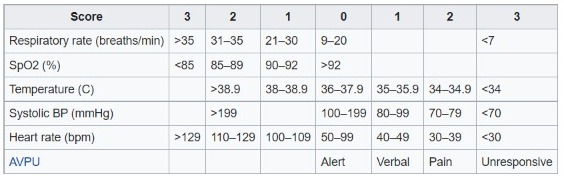

Respiratory rate 'Y'
Spo2 done
Temp 'AJ' in F it is all zeros
systolic bp high or low 
Heart rate ? pulse

# Prediction of future values

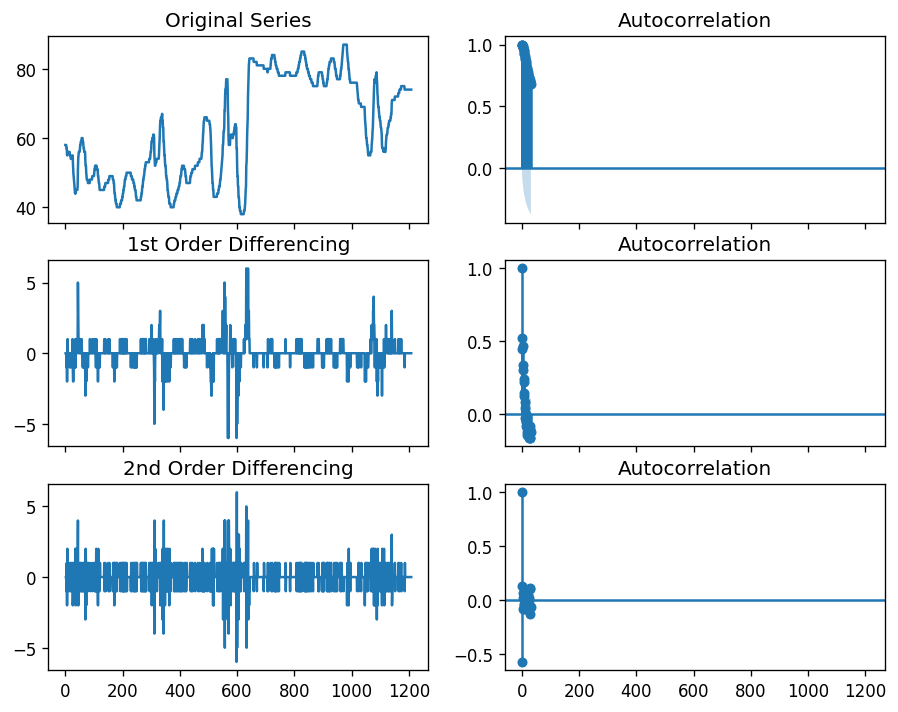

In [23]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})

# Original Series
fig, axes = plt.subplots(3, 2, sharex=True)
axes[0, 0].plot(df.Pulse); axes[0, 0].set_title('Original Series')
plot_acf(df.Pulse, ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(df.Pulse.diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(df.Pulse.diff().dropna(), ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(df.Pulse.diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(df.Pulse.diff().diff().dropna(), ax=axes[2, 1])

plt.show()

In [25]:
from statsmodels.tsa.arima_model import ARIMA
model=ARIMA(df['Pulse'],order=(1,1,1))
model_fit=model.fit()
model_fit.summary()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.14448D+00    |proj g|=  2.86904D-04

At iterate    5    f=  1.14448D+00    |proj g|=  2.54019D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      8     10      1     0     0   0.000D+00   1.144D+00
  F =   1.1444819545680356     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
 This problem is unconstrained.


<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.Pulse   No. Observations:                 1208
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1382.534
Method:                       css-mle   S.D. of innovations              0.760
Date:                Sat, 10 Sep 2022   AIC                           2773.068
Time:                        15:06:06   BIC                           2793.455
Sample:                             1   HQIC                          2780.745
                                                                              
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0124      0.085      0.146      0.884      -0.153       0.178
ar.L1.D.Pulse     0.8933      0.017     52.051      0.000       0.860       0.927
ma.L1.D.Pulse    -0.5852      0.027    -21.699      0.000      -0.638      -0.532
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.1194           +0.0000j            1.1194            0.0000
MA.1            1.7089           +0.0000j            1.7089            0.0000
-----------------------------------------------------------------------------
"""

<AxesSubplot:>

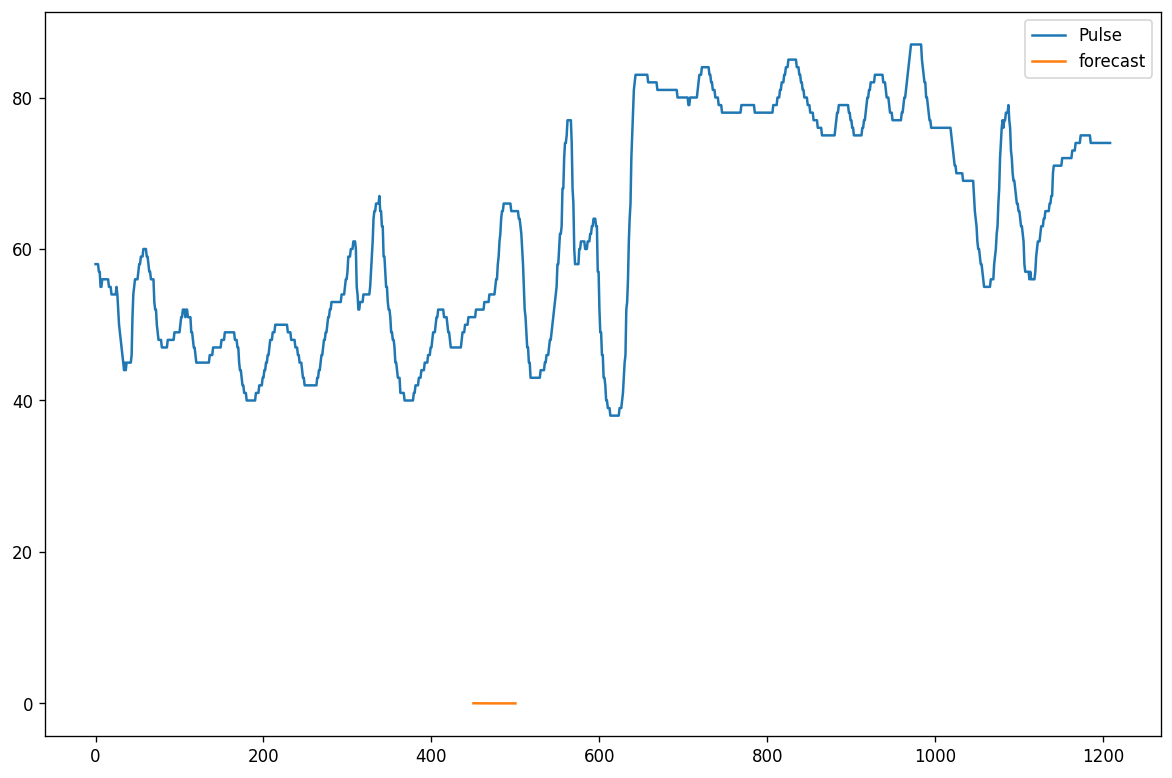

In [26]:
df['forecast']=model_fit.predict(start=450,end=500,dynamic=True)
df[['Pulse','forecast']].plot(figsize=(12,8))

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.35164D+00    |proj g|=  2.88151D-01

At iterate    5    f=  1.18587D+00    |proj g|=  8.61446D-02

At iterate   10    f=  1.15984D+00    |proj g|=  1.49990D-02

At iterate   15    f=  1.15311D+00    |proj g|=  1.17124D-02

At iterate   20    f=  1.15301D+00    |proj g|=  5.63398D-05

At iterate   25    f=  1.15301D+00    |proj g|=  8.93700D-04

At iterate   30    f=  1.15299D+00    |proj g|=  1.65681D-03

At iterate   35    f=  1.15298D+00    |proj g|=  5.02320D-04

At iterate   40    f=  1.15298D+00    |proj g|=  2.12707D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg 

<AxesSubplot:>

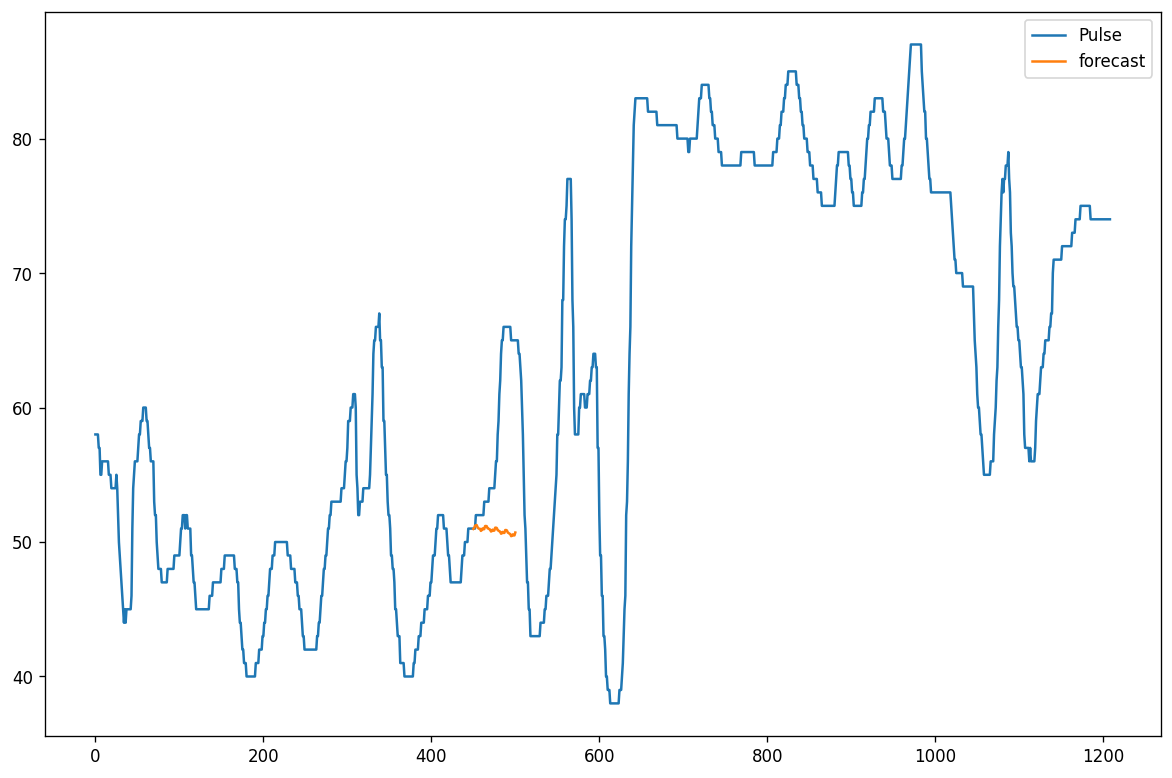

In [27]:
import statsmodels.api as sm
model=sm.tsa.statespace.SARIMAX(df['Pulse'],order=(1, 1, 1),seasonal_order=(1,1,1,12))
results=model.fit()
df['forecast']=results.predict(start=450,end=500,dynamic=True)
df[['Pulse','forecast']].plot(figsize=(12,8))